In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import hello_world, load_dataframes_fannie
hello_world()

Hello World!


# Loading The Data and Dataframes

In [2]:
!wget https://labs-fannie-data.s3.amazonaws.com/Acquisition/Acquisition_2000Q1.txt

--2019-10-26 19:55:07--  https://labs-fannie-data.s3.amazonaws.com/Acquisition/Acquisition_2000Q1.txt
Resolving labs-fannie-data.s3.amazonaws.com (labs-fannie-data.s3.amazonaws.com)... 52.216.114.187
Connecting to labs-fannie-data.s3.amazonaws.com (labs-fannie-data.s3.amazonaws.com)|52.216.114.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26908005 (26M) [text/plain]
Saving to: ‘Acquisition_2000Q1.txt’

Acquisition_2000Q1. 100%[===================>]  25.66M  32.5MB/s    in 0.8s    

2019-10-26 19:55:08 (32.5 MB/s) - ‘Acquisition_2000Q1.txt’ saved [26908005/26908005]



In [3]:
!wget https://labs-fannie-data.s3.amazonaws.com/Performance/Performance_2000Q1.txt

--2019-10-26 19:55:09--  https://labs-fannie-data.s3.amazonaws.com/Performance/Performance_2000Q1.txt
Resolving labs-fannie-data.s3.amazonaws.com (labs-fannie-data.s3.amazonaws.com)... 52.216.114.187
Connecting to labs-fannie-data.s3.amazonaws.com (labs-fannie-data.s3.amazonaws.com)|52.216.114.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 788948280 (752M) [text/plain]
Saving to: ‘Performance_2000Q1.txt’

Performance_2000Q1. 100%[===================>] 752.40M  33.7MB/s    in 21s     

2019-10-26 19:55:30 (35.6 MB/s) - ‘Performance_2000Q1.txt’ saved [788948280/788948280]



In [4]:
a_df, p_df = load_dataframes_fannie(
    "Acquisition_2000Q1.txt",
    "Performance_2000Q1.txt"
)

# Acquisitions Data Analysis

We will first run an analysis of the `Acquisition` data.

In [8]:
print(a_df.columns)

Index(['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM',
       'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'FTHB_FLG', 'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE',
       'ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
       'RELOCATION_FLG'],
      dtype='object')


### Columns to Analyze.

We will study the following:
- `ORIG_RT`
- `ORIG_AMT`
- `OLTV`
- `OCLTV`
- `DTI`
- `CSCORE_B`

# Descriptive Statistics

First, let's investigate the descriptive statistics involved.


In [47]:
def print_descriptive_stats(column):
    """
    """
    print(f"Getting Descriptive Statistics")
    print(f"Column Name: '{column.name}'")
    fig = plt.hist(column)
    print(f"Mean Value: {column.mean()}")
    print(f"STD  Value: {column.std()}")
    print(f"Min  Value: {column.min()}")
    print(f"Max  Value: {column.max()}")

## Original Rate

Getting Descriptive Statistics
Column Name: 'ORIG_RT'
Mean Value: 8.009949947946838
STD  Value: 0.4556470117137119
Min  Value: 3.0
Max  Value: 12.325


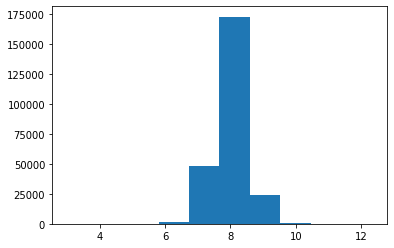

In [48]:
print_descriptive_stats(a_df["ORIG_RT"])

## Original Amount

Getting Descriptive Statistics
Column Name: 'ORIG_AMT'
Mean Value: 119903.06769341699
STD  Value: 56474.703864902054
Min  Value: 6000
Max  Value: 486000


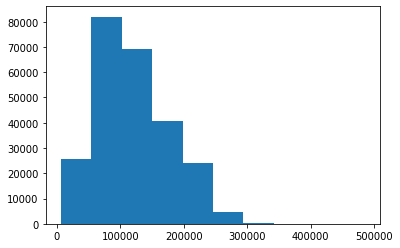

In [49]:
print_descriptive_stats(a_df['ORIG_AMT'])

## Original Loan To Value

Getting Descriptive Statistics
Column Name: 'OLTV'
Mean Value: 76.43044466319103
STD  Value: 16.321432152016186
Min  Value: 4.0
Max  Value: 97.0


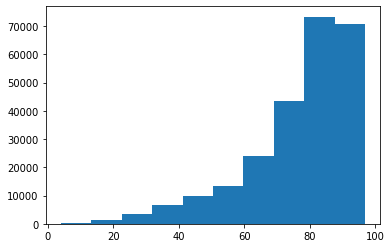

In [50]:
print_descriptive_stats(a_df['OLTV'])

## Original Combined Loan to Value

Getting Descriptive Statistics
Column Name: 'OCLTV'
Mean Value: 88.93156281920326
STD  Value: 10.050201938620017
Min  Value: 25.0
Max  Value: 146.0


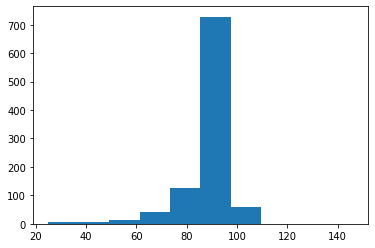

In [51]:
print_descriptive_stats(a_df['OCLTV'])

## Debt To Income

Getting Descriptive Statistics
Column Name: 'DTI'
Mean Value: 34.361626863903325
STD  Value: 11.999554980602742
Min  Value: 1.0
Max  Value: 64.0


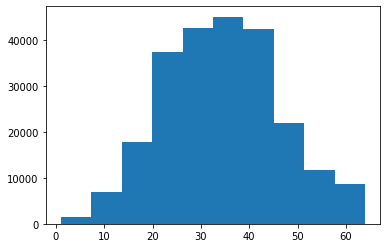

In [52]:
print_descriptive_stats(a_df['DTI'])

## Credit Score of Primary Borrower

Getting Descriptive Statistics
Column Name: 'CSCORE_B'
Mean Value: 714.993915472381
STD  Value: 54.9676797046954
Min  Value: 350.0
Max  Value: 850.0


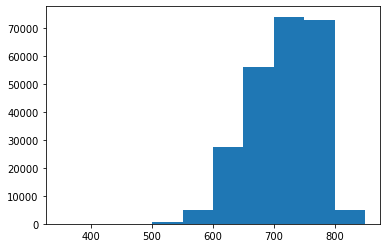

In [53]:
print_descriptive_stats(a_df['CSCORE_B'])

# Determining Correlations